# Ovnis

In [2]:
%config IPCompleter.greedy=True

import os
import zipfile
import pandas as pd
import numpy as np
from six.moves import urllib


#metodo para descargar y descomprimir archivos zip

def download_ovnis_data(ovnis_url, ovnis_path):
    if not os.path.isdir(ovnis_path):
        os.makedirs(ovnis_path)
    zip_path = os.path.join(ovnis_path, "ufo_sightings.zip")
    urllib.request.urlretrieve(ovnis_url, zip_path)
    ovnis_zip = zipfile.ZipFile(zip_path)
    ovnis_zip.extractall(path=ovnis_path)
    
#metodo para leer archivo tipo csv

def read_ovnis_data(ovnis_path, ovnis_name):
    csv_path = os.path.join(ovnis_path, ovnis_name)
    return pd.read_csv(csv_path)

In [2]:
#manda llamar al metodo para descargar los datos desde una url
download_ovnis_data("https://s3.us-east-2.amazonaws.com/recruiting-datasets/ufo_sightings.zip", os.path.join("dataset"))

In [3]:
#lee el set de datos y se muestran algunos valores
ovnis = read_ovnis_data(os.path.join("dataset"), "UFO_sightings.csv" )
ovnis.head()

C:\Users\Braus\anaconda3\envs\Intelimetrica\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [4]:
#muestra estructura de los datos (tipo de dato, numero de columnas y numero de datos por columna)
ovnis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


# Formato y llenado de datos erroneos

In [5]:
ovnis1 = ovnis.copy()

In [6]:
#formato de fecha
ovnis1["date posted"] = pd.to_datetime(ovnis1["date posted"])

In [7]:
#formato tipo string
#format_colums = ["datetime", "city", "state", "country", "shape", "duration (hours/min)", "comments"]
#ovnis1[format_colums].astype(str, errors="ignore" )

In [8]:
#dato erroneo
ovnis1.iloc[43782,9]

'33q.200088'

In [9]:
#reasigna valor
ovnis1.iloc[43782,9]=33.200088

In [10]:
#formato tipo numerico
ovnis1["latitude"] = pd.to_numeric(ovnis1["latitude"])

In [11]:
#busca datos tipo string en datos tipo numerico
ovnis1[ovnis1["duration (seconds)"].str.contains("`", na=False )]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
27822,2/2/2000 19:33,bouse,az,us,NaN,2`,each a few seconds,Driving through Plomosa Pass towards Bouse Loo...,2000-02-16,33.932500,-114.005000
35692,4/10/2005 22:52,santa cruz,ca,us,NaN,8`,eight seconds,2 red lights moving together and apart with a ...,2005-04-16,36.974167,-122.029722
58591,7/21/2006 13:00,ibague (colombia),NaN,NaN,circle,0.5`,1/2 segundo,Viajaba a 27.000 pies en un avion comercial ve...,2006-10-30,4.440663,-75.244141


In [13]:
#reasignan valores
ovnis1.iloc[27822, 5] = 2

In [14]:
ovnis1.iloc[35692, 5] = 8

In [15]:
ovnis1.iloc[58591, 5] = 0.5

In [16]:
#asigna formato tipo numerico
ovnis1["duration (seconds)"] = pd.to_numeric(ovnis1["duration (seconds)"])

In [17]:
#muestra los formatos correctos de los datos
ovnis1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              80332 non-null  object        
 1   city                  80332 non-null  object        
 2   state                 74535 non-null  object        
 3   country               70662 non-null  object        
 4   shape                 78400 non-null  object        
 5   duration (seconds)    80332 non-null  float64       
 6   duration (hours/min)  80332 non-null  object        
 7   comments              80317 non-null  object        
 8   date posted           80332 non-null  datetime64[ns]
 9   latitude              80332 non-null  float64       
 10  longitude             80332 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 6.7+ MB


# Visualizacion grafica de datos

Text(0.5, 1.0, 'City')

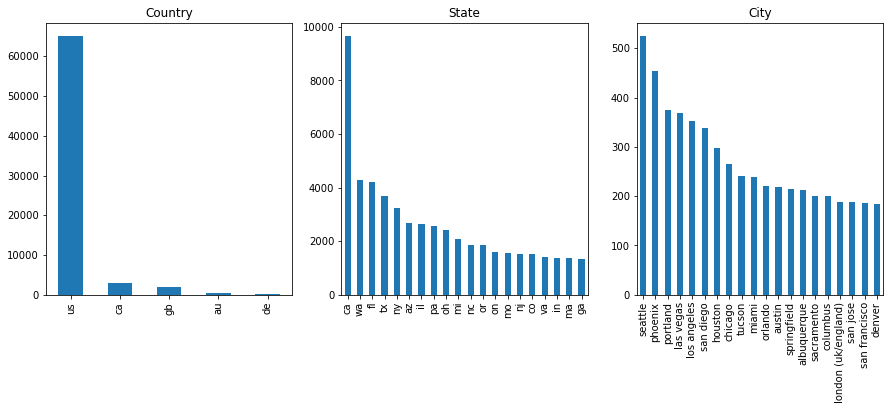

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))

#grafica de los primeros 20 valores mas significativos para el caso por pais, estado y ciudad

fig.add_subplot(1,3,1)
ovnis1["country"].value_counts()[0:5].plot(kind="bar").set_title("Country")
fig.add_subplot(1,3,2)
ovnis1["state"].value_counts()[0:20].plot(kind="bar").set_title("State")
fig.add_subplot(1,3,3)
ovnis1["city"].value_counts()[0:20].plot(kind="bar").set_title("City")

# Resultados

In [ ]:
#muestran los lugares con mayor numero de avistamientos 

In [100]:
ovnis1["country"].value_counts()[0:1]

us    65114
Name: country, dtype: int64

In [101]:
ovnis1["state"].value_counts()[0:1]

ca    9655
Name: state, dtype: int64

In [104]:
ovnis1["city"].value_counts()[0:1]

seattle    525
Name: city, dtype: int64

In [163]:
#muestra la ciudad con mayor avistamientos segun el estado de ca
ca["city"].value_counts()[0:1]

los angeles                   352
san diego                     336
sacramento                    201
san jose                      186
san francisco                 186
                             ... 
sherman oaks (los angeles)      1
los angeles (glassel park)      1
san diego (allied gardens)      1
camarillo (rural)               1
los angeles (eagle rock)        1
Name: city, Length: 1203, dtype: int64